# 2D Convolution (画像のフィルタリング)

1次元の信号と同様に，画像に対してローパスフィルタ(LPF)やハイパスフィルタ(HPF)によるフィルタリングを適用することができる．LPFはノイズ除去や画像をぼかすために，HPFは画像中のエッジ検出に使われる．

cv2.filter2D() 関数は入力画像とカーネル(フィルタ)の畳み込み(convolution)を計算する．以下に5x5サイズの平均値フィルタに使うカーネルを示す:

このカーネルを使った計算は次のように行われる: それぞれの画素に対し、その画素を中心にした周辺5x5の画素（これをウィンドウと呼ぶ)に対し、全部の画素値の合計を求め、それを25で割る．この処理はウィンドウ内の画素値の平均を取る処理になっている．この計算を全画素に対して適用する（フィルタリングした画像を作る）

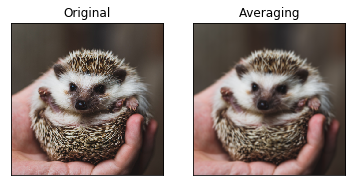

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# 画像のぼかし (平滑化)

## 1. 平均

平均を取るには正規化された箱型フィルタを使う． カーネルの範囲内にある全画素の画素値の平均をとる．cv2.blur() か cv2.boxFilter() を使う．ここでカーネルの縦幅，横幅を指定する必要がある．このカーネルに関する詳細についてはドキュメントを参照のこと．3x3の箱型フィルタは以下のようになる:

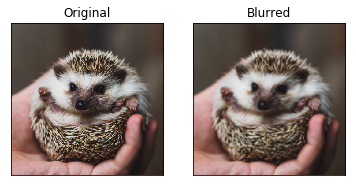

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


## 2. ガウシアンフィルタ

箱型フィルタの場合カーネル内のフィルタ係数が一様だったのに対して，ガウシアンフィルタは注目画素との距離に応じて重みを変えるガウシアンカーネルを採用している．それにはcv2.GaussianBlur() 関数を使う．カーネルの縦幅と横幅(どちらも奇数でなければならない)に加え，ガウシアンの標準偏差値sigmaX(横方向)とsigmaY(縦方向)を指定する必要がある．sigmaXしか指定されない場合は，sigmaYはsigmaXと同じして扱われる．どちらの値も0にした場合は，カーネルのサイズから自動的に計算される．ガウシアンフィルタは白色雑音の除去に適している．

cv2.getGaussianKernel() 関数を使えば，ガウシアンフィルタを作成することができる．

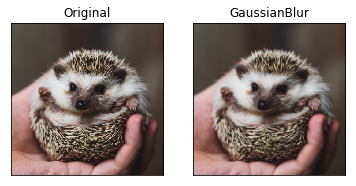

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()


## 3. 中央値フィルタ

cv2.medianBlur() 関数はカーネル内の全画素の中央値を計算する．ごま塩ノイズのようなノイズに対して効果的である．箱型フィルタとガウシアンフィルタの出力が原画像中には存在しない画素値を出力するのに対し，中央値フィルタの出力は常に原画像中から選ばれる．そのためごま塩ノイズのような特異なノイズに対して効果的である．ここでカーネルサイズは奇数でなければならない．

この例では原画像に対して50%のノイズを追加した劣化画像に中央値フィルタを適用している．:

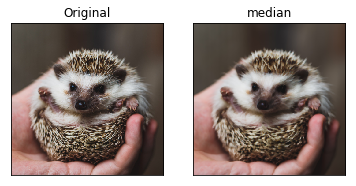

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()


## 4. バイラテラルフィルタ

前述のように，フィルタリングは一般的にエッジまでぼかしてしまうが， cv2.bilateralFilter() によって使えるバイラテラルフィルタはエッジを保存しながら画像をぼかすことができる．しかし，上記のフィルタリングに比べて処理速度が遅いという欠点がある．既に紹介したガウシアンフィルタは、注目している画素の近傍領域に対し、重み付け平均した値を出力する．これはガウシアンフィルタが注目画素の近傍の画素のみを考慮した関数であることを意味する．近傍領域内の画素が似たような値を持っているか否か，注目画素がエッジ上に存在するか否かどうかは考慮されない．その結果としてガウシアンフィルタはエッジの劣化が不可避である．

バイラテラルフィルタも同様にガウシアンフィルタを採用しているが，画素値の差を考慮した関数として別のガウシアンフィルタも同時に使用する．一つ目のガウシアンフィルタでは、フィルタリングに使用する画素は ‘空間的に近い位置にある’ことを保証している．一方で，二つ目のガウシアンフィルタは、注目画素に似た画素値を持つ画素の値のみ考慮してフィルタリングすることを保証する．その結果、バイラテラルフィルタはエッジを保存した画像のぼかしを実現できることになる．

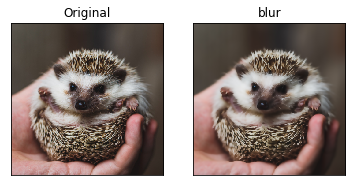

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('blur')
plt.xticks([]), plt.yticks([])
plt.show()
